### Import libraries

In [3]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
import shap

In [4]:
# Load dataset
df = pd.read_excel("tiktok_dataset.xlsx")
df.head()

,authorMeta/id,authorMeta/name,authorMeta/digg,authorMeta/fans,authorMeta/following,authorMeta/heart,authorMeta/signature,authorMeta/verified,authorMeta/video,commentCount,...,musicMeta/musicName,musicMeta/musicOriginal,playCount,searchHashtag/name,searchHashtag/views,shareCount,text,videoMeta/duration,videoMeta/height,videoMeta/width
0,6713126981665686530,miso_ara,420,13200000,28,150400000,soonent@soon-ent.co.kr\n.\n Miso Ara IG,True,303,66000,...,???? ??? - Miso_Ara,True,200600000,meme,556B,377700,Ara Woah #woah #woahchallenge #foryou #fyp...,17,1280,720
1,6929583089811522566,crinka11,10800,1300000,182,35100000,insta: chrisrinker73,False,518,154100,...,original sound,True,79600000,meme,556B,205400,#fyp #meme #funny #meme #vine,11,1024,576
2,7083448802635596842,iampets_com,251,696800,42,15900000,"Pet supplies, toys online store. All products ...",False,90,55300,...,nh?c n?n,True,106100000,meme,556B,323000,The end #funny #funnyvideos #animals #haha #me...,25,1024,576
3,7087287470497645573,dailydosevideos_,218,510200,56,32100000,Daily dose of videos/memes \nsupport the page ...,False,84,70600,...,original sound,True,72500000,meme,556B,133400,Try not to laugh hard #meme #trynottolaughtik...,62,1024,576
4,6621521206107717638,jakeypoov,47600,3300000,690,137300000,-.-- --- ..- .-. . .-.. --- ...- . -.. ...,True,247,35500,...,original sound,True,62700000,meme,556B,252900,HE DIDN’T HAVE HIS MASK ON @abbysherm (Follow...,36,1024,576


### Data preprocessing

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   authorMeta/id            1200 non-null   int64  
 1   authorMeta/name          1200 non-null   object 
 2   authorMeta/digg          1200 non-null   int64  
 3   authorMeta/fans          1200 non-null   int64  
 4   authorMeta/following     1200 non-null   int64  
 5   authorMeta/heart         1200 non-null   int64  
 6   authorMeta/signature     1141 non-null   object 
 7   authorMeta/verified      1200 non-null   bool   
 8   authorMeta/video         1200 non-null   int64  
 9   commentCount             1200 non-null   int64  
 10  createTime               1200 non-null   int64  
 11  createTimeISO            1200 non-null   object 
 12  diggCount                1200 non-null   int64  
 13  downloaded               1200 non-null   bool   
 14  effectStickers/0/ID     

In [6]:
# Convert effectStickers/0/ID and mentions/0 to logical type 0 and 1
df['effectStickers/0/ID'] = df['effectStickers/0/ID'].fillna(0).apply(lambda x: 1 if x!= 0 else 0)
df['mentions/0'] = df['mentions/0'].fillna(0).apply(lambda x: 1 if x!= 0 else 0)

# Convert all boolean type columns into 0 and 1
df = df.astype({col: int for col in df.select_dtypes(include=bool).columns})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   authorMeta/id            1200 non-null   int64  
 1   authorMeta/name          1200 non-null   object 
 2   authorMeta/digg          1200 non-null   int64  
 3   authorMeta/fans          1200 non-null   int64  
 4   authorMeta/following     1200 non-null   int64  
 5   authorMeta/heart         1200 non-null   int64  
 6   authorMeta/signature     1141 non-null   object 
 7   authorMeta/verified      1200 non-null   int32  
 8   authorMeta/video         1200 non-null   int64  
 9   commentCount             1200 non-null   int64  
 10  createTime               1200 non-null   int64  
 11  createTimeISO            1200 non-null   object 
 12  diggCount                1200 non-null   int64  
 13  downloaded               1200 non-null   int32  
 14  effectStickers/0/ID     

In [7]:
# Check percentage of missing per column
missing_values = df.isnull().mean()*100
missing_values

authorMeta/id               0.000000
authorMeta/name             0.000000
authorMeta/digg             0.000000
authorMeta/fans             0.000000
authorMeta/following        0.000000
authorMeta/heart            0.000000
authorMeta/signature        4.916667
authorMeta/verified         0.000000
authorMeta/video            0.000000
commentCount                0.000000
createTime                  0.000000
createTimeISO               0.000000
diggCount                   0.000000
downloaded                  0.000000
effectStickers/0/ID         0.000000
hashtags/0/cover           87.666667
hashtags/0/id               0.166667
hashtags/0/name             0.250000
hashtags/0/title           73.333333
hashtags/1/cover           90.833333
hashtags/1/id               1.583333
hashtags/1/name             1.833333
hashtags/1/title           76.916667
mentions/0                  0.000000
musicMeta/musicAuthor       1.666667
musicMeta/musicName         0.000000
musicMeta/musicOriginal     0.000000
p

In [8]:
# Drop columns with missing > 70% missing values
df_filter = df.loc[:, missing_values <= 70]

# Drop unnecessary columns for this analysis: createTime, createTimeISO, videoMeta/height, videoMeta/width
df_filter = df_filter.drop(columns=['createTime', 'createTimeISO', 'videoMeta/height', 'videoMeta/width', 'hashtags/0/id', 'hashtags/1/id'])
df_filter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   authorMeta/id            1200 non-null   int64 
 1   authorMeta/name          1200 non-null   object
 2   authorMeta/digg          1200 non-null   int64 
 3   authorMeta/fans          1200 non-null   int64 
 4   authorMeta/following     1200 non-null   int64 
 5   authorMeta/heart         1200 non-null   int64 
 6   authorMeta/signature     1141 non-null   object
 7   authorMeta/verified      1200 non-null   int32 
 8   authorMeta/video         1200 non-null   int64 
 9   commentCount             1200 non-null   int64 
 10  diggCount                1200 non-null   int64 
 11  downloaded               1200 non-null   int32 
 12  effectStickers/0/ID      1200 non-null   int64 
 13  hashtags/0/name          1197 non-null   object
 14  hashtags/1/name          1178 non-null  

In [9]:
# Convert searchHashtag/views ending with B or M to int type
# Function to convert B (billion) and M (million) to numbers
def convert_to_number(value):
    if "B" in value:
        value = float(value.strip("B")) * 1_000_000_000
    elif "M" in value:
        value = float(value.strip("M")) * 1_000_000
    else:
        value = float(value)
    return value

# Apply conversion to a new column named hashtagView_million
df_filter['hashtagView_million'] = df_filter['searchHashtag/views'].apply(convert_to_number)

# Scale the number down to million for readability
df_filter['hashtagView_million'] = df_filter['hashtagView_million'] / 10**6
df_filter['hashtagView_million'] = df_filter['hashtagView_million'].astype(int)

df_filter.head()

,authorMeta/id,authorMeta/name,authorMeta/digg,authorMeta/fans,authorMeta/following,authorMeta/heart,authorMeta/signature,authorMeta/verified,authorMeta/video,commentCount,...,musicMeta/musicAuthor,musicMeta/musicName,musicMeta/musicOriginal,playCount,searchHashtag/name,searchHashtag/views,shareCount,text,videoMeta/duration,hashtagView_million
0,6713126981665686530,miso_ara,420,13200000,28,150400000,soonent@soon-ent.co.kr\n.\n Miso Ara IG,1,303,66000,...,???? Miso_Ara,???? ??? - Miso_Ara,1,200600000,meme,556B,377700,Ara Woah #woah #woahchallenge #foryou #fyp...,17,556000
1,6929583089811522566,crinka11,10800,1300000,182,35100000,insta: chrisrinker73,0,518,154100,...,Chris Rinker,original sound,1,79600000,meme,556B,205400,#fyp #meme #funny #meme #vine,11,556000
2,7083448802635596842,iampets_com,251,696800,42,15900000,"Pet supplies, toys online store. All products ...",0,90,55300,...,IamPéts,nh?c n?n,1,106100000,meme,556B,323000,The end #funny #funnyvideos #animals #haha #me...,25,556000
3,7087287470497645573,dailydosevideos_,218,510200,56,32100000,Daily dose of videos/memes \nsupport the page ...,0,84,70600,...,dailydosevideos,original sound,1,72500000,meme,556B,133400,Try not to laugh hard #meme #trynottolaughtik...,62,556000
4,6621521206107717638,jakeypoov,47600,3300000,690,137300000,-.-- --- ..- .-. . .-.. --- ...- . -.. ...,1,247,35500,...,Jake Sherman,original sound,1,62700000,meme,556B,252900,HE DIDN’T HAVE HIS MASK ON @abbysherm (Follow...,36,556000


In [10]:
# Download VADER lexicon for sentiment analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')
import re
from wordcloud import WordCloud

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\nguye\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [87]:
# Prepare a df for sentiment analysis
df_sen = df_filter[['diggCount','shareCount','playCount','commentCount','authorMeta/fans','authorMeta/heart','authorMeta/signature','text']]


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


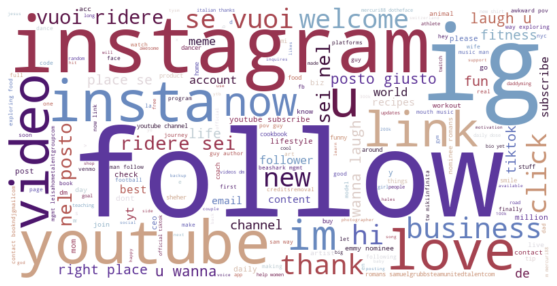


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [89]:
# Clean text data
def clean_text(text):
    if isinstance(text, str):
        text = re.sub(r'http\S+', '', text)  # Remove URLs
        text = re.sub(r'[^a-zA-Z0-9\s#]', '', text)  # Remove special characters except hashtags
        text = text.lower()  # Convert to lowercase
    else:
        text = ''  # Replace non-string values with an empty string
    return text

df_sen['cleaned_signature'] = df_sen['authorMeta/signature'].apply(clean_text)
df_sen

# Combine all text for word cloud
all_text = ' '.join(df_sen['cleaned_signature'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap="twilight").generate(all_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Sentiment Analysis using VADER
sid = SentimentIntensityAnalyzer()
df_sen['sentiment_sig'] = df_sen['cleaned_signature'].apply(lambda x: sid.polarity_scores(x)['compound'])
df_sen['sentiment_sig'] = df_sen['sentiment_sig'].astype(float).round(2)


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


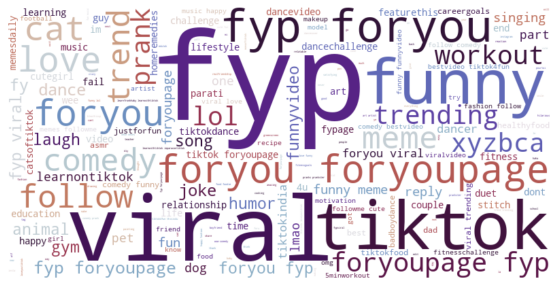


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [91]:
# Clean text data
def clean_text(text):
    if isinstance(text, str):
        text = re.sub(r'http\S+', '', text)  # Remove URLs
        text = re.sub(r'[^a-zA-Z0-9\s#]', '', text)  # Remove special characters except hashtags
        text = text.lower()  # Convert to lowercase
    else:
        text = ''  # Replace non-string values with an empty string
    return text

df_sen['cleaned_text'] = df_sen['text'].apply(clean_text)
df_sen

# Combine all text for word cloud
all_text = ' '.join(df_sen['cleaned_text'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap="twilight").generate(all_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Sentiment Analysis using VADER
sid = SentimentIntensityAnalyzer()
df_sen['sentiment'] = df_sen['cleaned_text'].apply(lambda x: sid.polarity_scores(x)['compound'])
df_sen['sentiment'] = df_sen['sentiment'].astype(float).round(2)

In [93]:
df_sen.head()

,diggCount,shareCount,playCount,commentCount,authorMeta/fans,authorMeta/heart,authorMeta/signature,text,cleaned_signature,sentiment_sig,cleaned_text,sentiment
0,19300000,377700,200600000,66000,13200000,150400000,soonent@soon-ent.co.kr\n.\n Miso Ara IG,Ara Woah #woah #woahchallenge #foryou #fyp...,soonentsoonentcokr\n\n miso ara ig,0.00,ara woah #woah #woahchallenge #foryou #fyp...,0.00
1,15400000,205400,79600000,154100,1300000,35100000,insta: chrisrinker73,#fyp #meme #funny #meme #vine,insta chrisrinker73,0.00,#fyp #meme #funny #meme #vine,0.00
2,13900000,323000,106100000,55300,696800,15900000,"Pet supplies, toys online store. All products ...",The end #funny #funnyvideos #animals #haha #me...,pet supplies toys online store all products in...,0.00,the end #funny #funnyvideos #animals #haha #me...,0.00
3,13100000,133400,72500000,70600,510200,32100000,Daily dose of videos/memes \nsupport the page ...,Try not to laugh hard #meme #trynottolaughtik...,daily dose of videosmemes \nsupport the page i...,0.46,try not to laugh hard #meme #trynottolaughtik...,-0.39
4,13100000,252900,62700000,35500,3300000,137300000,-.-- --- ..- .-. . .-.. --- ...- . -.. ...,HE DIDN’T HAVE HIS MASK ON @abbysherm (Follow...,\nim the vent guy,0.00,he didnt have his mask on abbysherm follow my...,0.00


In [14]:
# Plot relationship between word frequency and sentiment
top_words = wordcloud.words_
words_sentiment = [(word, df_sen[df_sen['cleaned_text'].str.contains(word)]['sentiment'].mean()) for word in top_words.keys()]

# Convert to DataFrame
df_words_sentiment = pd.DataFrame(words_sentiment, columns=['word', 'average_sentiment'])

# Remove rows with NaN values in 'average_sentiment'
df_words_sentiment = df_words_sentiment.dropna(subset=['average_sentiment'])

# Sort words by average sentiment
sorted_words = df_words_sentiment.sort_values(by='average_sentiment')

# Plot
# plt.figure(figsize=(14, 20))
# plt.barh(df_words_sentiment['word'], df_words_sentiment['average_sentiment'])
# plt.xlabel('Average Sentiment')
# plt.ylabel('Word')
# plt.title('Relationship between Word Frequency and Sentiment')
# plt.show()

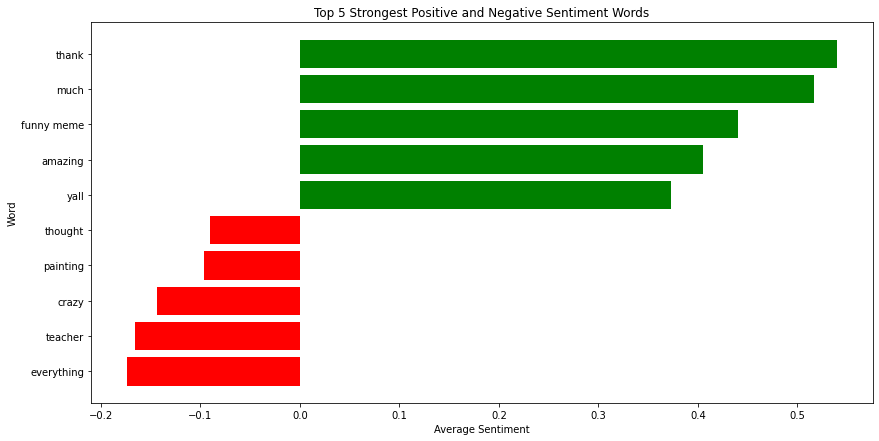

In [99]:
# Sort words by average sentiment
sorted_words = df_words_sentiment.sort_values(by='average_sentiment')

# Select top 10 negative and positive words
top_negative_words = sorted_words.head(5)
top_positive_words = sorted_words.tail(5)

# Combine for plotting
top_words = pd.concat([top_negative_words, top_positive_words])

# Create color list based on sentiment
colors = ['red'] * len(top_negative_words) + ['green'] * len(top_positive_words)

# Plot top 10 positive and negative words
plt.figure(figsize=(14, 7))
plt.barh(top_words['word'], top_words['average_sentiment'], color=colors)
plt.xlabel('Average Sentiment')
plt.ylabel('Word')
plt.title('Top 5 Strongest Positive and Negative Sentiment Words')
plt.show()

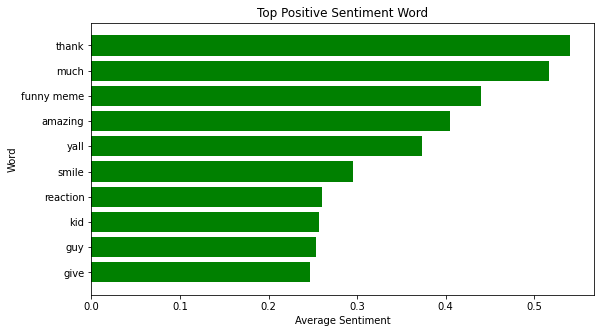

In [16]:
# Plot top 10 positive words
plt.figure(figsize=(9, 5))
plt.barh(top_positive_words['word'], top_positive_words['average_sentiment'], color='green')
plt.xlabel('Average Sentiment')
plt.ylabel('Word')
plt.title('Top Positive Sentiment Word')
plt.show()

### Visualise the relationship between sentiments and other metrics
- diggCount: Number of likes for a video
- shareCount: Number of times a video was shared
- playCount: Number of times a video was played
- commentCount: Number of comments made on the video
- authorMeta/fans: Number of accounts following the profile
- authorMeta/heart: Number of likes, in totality, on the profile's posted content

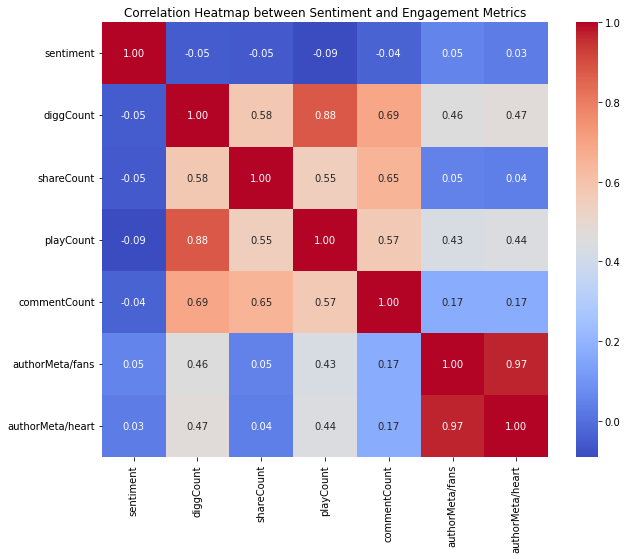

In [17]:
# Calculate correlation matrix
correlation_matrix = df_sen[['sentiment', 'diggCount','shareCount','playCount','commentCount','authorMeta/fans','authorMeta/heart']].corr()

# Generate heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap between Sentiment and Engagement Metrics')
plt.show()

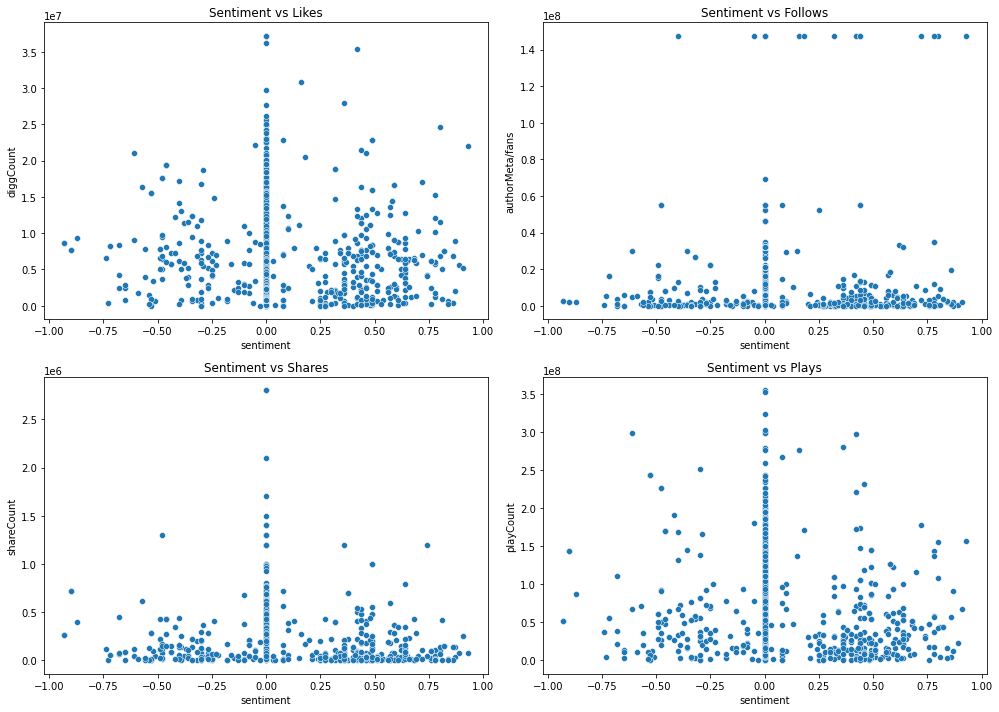

In [18]:
# Scatter plot
# Scatter plots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

sns.scatterplot(data=df_sen, x='sentiment', y='diggCount', ax=axs[0, 0])
axs[0, 0].set_title('Sentiment vs Likes')

sns.scatterplot(data=df_sen, x='sentiment', y='authorMeta/fans', ax=axs[0, 1])
axs[0, 1].set_title('Sentiment vs Follows')

sns.scatterplot(data=df_sen, x='sentiment', y='shareCount', ax=axs[1, 0])
axs[1, 0].set_title('Sentiment vs Shares')

sns.scatterplot(data=df_sen, x='sentiment', y='playCount', ax=axs[1, 1])
axs[1, 1].set_title('Sentiment vs Plays')

plt.tight_layout()
plt.show()

C:\Users\nguye\AppData\Local\Temp\ipykernel_7964\518594001.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sen['sentiment_category'] = pd.cut(df_sen['sentiment'], bins=[-1, -0.5, 0.5, 1], labels=['Negative', 'Neutral', 'Positive'])
c:\Users\nguye\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:253: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\nguye\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:253: FutureWarning: The default of observed=F

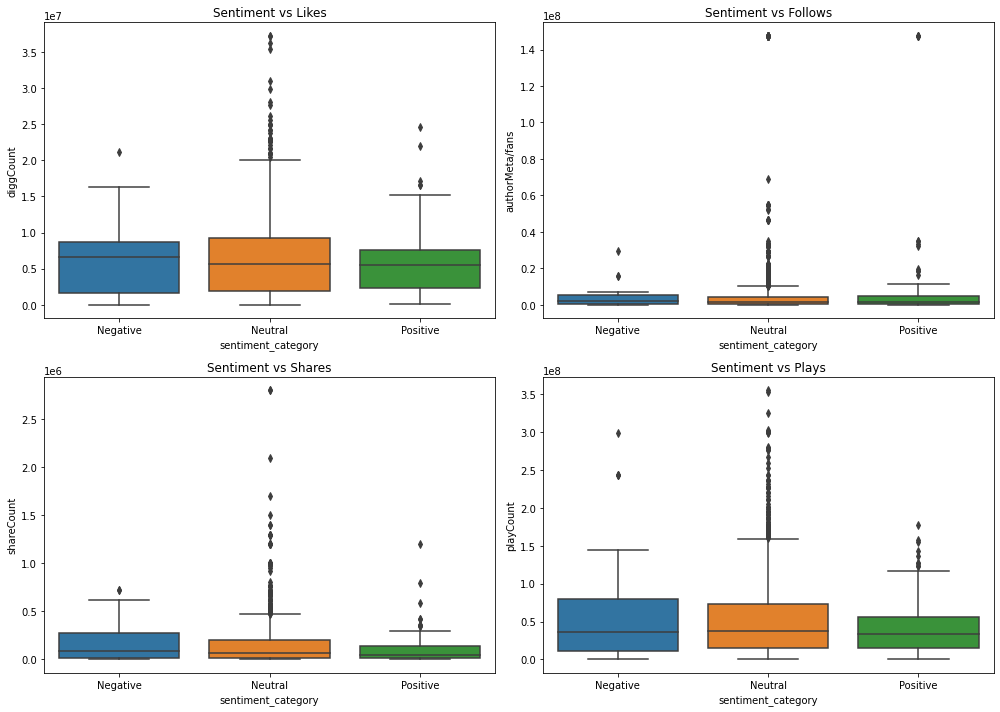

In [19]:
# Box plots
# Categorize sentiment
df_sen['sentiment_category'] = pd.cut(df_sen['sentiment'], bins=[-1, -0.5, 0.5, 1], labels=['Negative', 'Neutral', 'Positive'])

fig, axs = plt.subplots(2, 2, figsize=(14, 10))

sns.boxplot(data=df_sen, x='sentiment_category', y='diggCount', ax=axs[0, 0])
axs[0, 0].set_title('Sentiment vs Likes')

sns.boxplot(data=df_sen, x='sentiment_category', y='authorMeta/fans', ax=axs[0, 1])
axs[0, 1].set_title('Sentiment vs Follows')

sns.boxplot(data=df_sen, x='sentiment_category', y='shareCount', ax=axs[1, 0])
axs[1, 0].set_title('Sentiment vs Shares')

sns.boxplot(data=df_sen, x='sentiment_category', y='playCount', ax=axs[1, 1])
axs[1, 1].set_title('Sentiment vs Plays')

plt.tight_layout()
plt.show()

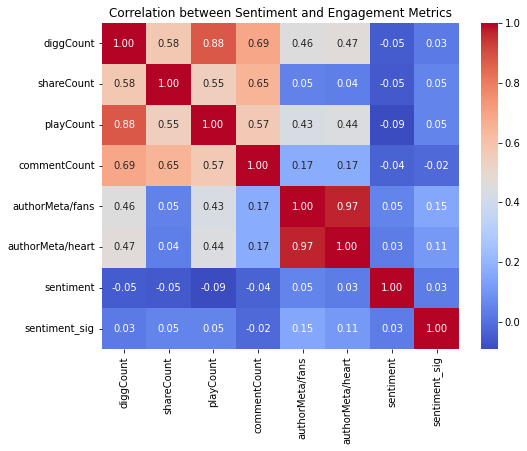

In [101]:
# Calculate correlations
correlation = df_sen[['diggCount','shareCount','playCount','commentCount','authorMeta/fans','authorMeta/heart','sentiment','sentiment_sig']].corr()

# Visualize correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation between Sentiment and Engagement Metrics")
plt.show()


In [20]:
# Calculate statistics
summary_stats = df_sen[['sentiment', 'diggCount','shareCount','playCount','commentCount','authorMeta/fans','authorMeta/heart']].agg(['mean', 'median', 'std', 'min', 'max'])
summary_stats

,sentiment,diggCount,shareCount,playCount,commentCount,authorMeta/fans,authorMeta/heart
mean,0.064983,6.577728e+06,1.569660e+05,5.468718e+07,53554.415000,7.124049e+06,1.475789e+08
median,0.000000,5.700000e+06,6.515000e+04,3.690000e+07,29500.000000,1.300000e+06,2.620000e+07
std,0.274416,5.867806e+06,2.546967e+05,5.784957e+07,74139.653978,2.096570e+07,3.599765e+08
min,-0.930000,9.670000e+02,0.000000e+00,9.225000e+03,0.000000,4.180000e+02,6.064000e+03
max,0.930000,3.720000e+07,2.800000e+06,3.548000e+08,715500.000000,1.475000e+08,2.300000e+09


In [21]:
#  2   authorMeta/digg          1200 non-null   int64  
#  3   authorMeta/fans          1200 non-null   int64  
#  4   authorMeta/following     1200 non-null   int64  
#  5   authorMeta/heart         1200 non-null   int64   
#  9   commentCount             1200 non-null   int64  
#  12  diggCount                1200 non-null   int64  
#  23  mentions/0               232 non-null    int  
#  27  playCount                1200 non-null   int64  
#  29  hashtagView_million      1200 non-null   int
#  30  shareCount               1200 non-null   int64   

In [51]:
# Feature engineering
df_eng = df_filter[['authorMeta/digg','authorMeta/fans','authorMeta/following','authorMeta/heart', 'authorMeta/video',
                    'commentCount','diggCount','shareCount','playCount','mentions/0','hashtagView_million','videoMeta/duration']]
df_eng['sentiment'] = df_sen['sentiment']
df_eng['engagement'] = (df_eng['diggCount'] + df_eng['shareCount'] + df_eng['commentCount'])/ df_eng['playCount'] * 100
df_eng.describe()


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,authorMeta/digg,authorMeta/fans,authorMeta/following,authorMeta/heart,authorMeta/video,commentCount,diggCount,shareCount,playCount,mentions/0,hashtagView_million,videoMeta/duration,sentiment,engagement
count,1.200000e+03,1.200000e+03,1200.000000,1.200000e+03,1200.000000,1200.000000,1.200000e+03,1.200000e+03,1.200000e+03,1200.000000,1.200000e+03,1200.000000,1200.000000,1200.000000
mean,1.894140e+04,7.124049e+06,508.820000,1.475789e+08,618.774167,53554.415000,6.577728e+06,1.569660e+05,5.468718e+07,0.193333,4.512024e+05,29.741667,0.064983,14.421694
std,1.660581e+05,2.096570e+07,1237.753254,3.599765e+08,1598.081980,74139.653978,5.867806e+06,2.546967e+05,5.784957e+07,0.395077,1.362689e+06,28.546173,0.274416,6.285726
min,0.000000e+00,4.180000e+02,0.000000,6.064000e+03,1.000000,0.000000,9.670000e+02,0.000000e+00,9.225000e+03,0.000000,2.000000e+00,0.000000,-0.930000,1.040809
25%,1.044250e+03,2.792000e+05,38.000000,8.200000e+06,113.000000,8459.000000,1.900000e+06,1.717500e+04,1.447500e+07,0.000000,8.350000e+03,13.000000,0.000000,9.952575
50%,4.908000e+03,1.300000e+06,131.000000,2.620000e+07,315.500000,29500.000000,5.700000e+06,6.515000e+04,3.690000e+07,0.000000,8.570000e+04,19.000000,0.000000,13.636118
75%,1.550000e+04,4.525000e+06,403.250000,1.074000e+08,754.000000,70500.000000,9.025000e+06,1.971750e+05,7.085000e+07,0.000000,2.884250e+05,41.000000,0.000000,18.379310
max,5.700000e+06,1.475000e+08,10000.000000,2.300000e+09,34500.000000,715500.000000,3.720000e+07,2.800000e+06,3.548000e+08,1.000000,9.793300e+06,356.000000,0.930000,62.225100


In [60]:
# Define the number of bins and their labels
num_bins = 3
bin_labels = ['Low', 'Medium','High']

# Create bins using pd.qcut - cut according to quantile
df_eng['engagement_category'] = pd.qcut(df_eng['engagement'], q=num_bins, labels=bin_labels)


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [62]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [64]:
# Define features and target for engagement prediction
X = df_eng.drop(columns=['engagement', 'engagement_category'])  # Features
y = df_eng['engagement_category']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the linear regression model
model = LogisticRegression()

# Train the model using the scaled training data
model.fit(X_train_scaled, y_train)

# Make predictions on the scaled testing data
y_pred = model.predict(X_test_scaled)

# # Evaluate the model using regression metrics
# mse = mean_squared_error(y_test, y_pred)
# mae = mean_absolute_error(y_test, y_pred)
# rmse = np.sqrt(mse)
# r2 = r2_score(y_test, y_pred)

# print(f"Mean Squared Error (MSE): {mse:.2f}")
# print(f"Mean Absolute Error (MAE): {mae:.2f}")
# print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
# print(f"R-squared (R²): {r2:.2f}")

# # Display coefficients with feature names
# coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
# print(coefficients)

In [66]:
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score, classification_report

# Assuming y_test and y_pred are the true and predicted labels from your classification model

# Calculate metrics
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(pd.get_dummies(y_test), pd.get_dummies(y_pred), multi_class='ovo')

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")

# Detailed classification report
print(classification_report(y_test, y_pred, target_names=bin_labels))

Precision: 0.91
Recall: 0.90
F1-Score: 0.90
ROC-AUC: 0.28
              precision    recall  f1-score   support

         Low       0.89      0.99      0.93        78
      Medium       0.89      0.94      0.91        78
        High       0.94      0.80      0.86        84

    accuracy                           0.90       240
   macro avg       0.91      0.91      0.90       240
weighted avg       0.91      0.90      0.90       240



In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Initialize the Decision Tree model
dt_model = DecisionTreeRegressor(random_state=42)

# Train the model using the scaled training data
dt_model.fit(X_train_scaled, y_train)

# Make predictions on the scaled testing data
y_pred_dt = dt_model.predict(X_test_scaled)

# Evaluate the model
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f"Decision Tree - Mean Squared Error (MSE): {mse_dt:.2f}")
print(f"Decision Tree - R-squared (R²): {r2_dt:.2f}")

In [71]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rf_model = RandomForestClassifier()

# Train the model using the scaled training data
rf_model.fit(X_train_scaled, y_train)

# Make predictions on the scaled testing data
y_pred_rf = rf_model.predict(X_test_scaled)

# Calculate metrics
precision = precision_score(y_test, y_pred_rf, average='weighted')
recall = recall_score(y_test, y_pred_rf, average='weighted')
f1 = f1_score(y_test, y_pred_rf, average='weighted')
roc_auc = roc_auc_score(pd.get_dummies(y_test), pd.get_dummies(y_pred_rf), multi_class='ovo')

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")

# Detailed classification report
print(classification_report(y_test, y_pred_rf, target_names=bin_labels))

# # Evaluate the model
# mse_rf = mean_squared_error(y_test, y_pred_rf)
# r2_rf = r2_score(y_test, y_pred_rf)

# print(f"Random Forest - Mean Squared Error (MSE): {mse_rf:.2f}")
# print(f"Random Forest - R-squared (R²): {r2_rf:.2f}")

# Display feature importances
importances = pd.DataFrame(rf_model.feature_importances_, X.columns, columns=['Importance'])
print(importances.sort_values(by='Importance', ascending=False))

# Feature importance
importances = rf_model.feature_importances_
features = X.columns

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

Precision: 0.75
Recall: 0.75
F1-Score: 0.75
ROC-AUC: 0.34
              precision    recall  f1-score   support

         Low       0.74      0.86      0.79        78
      Medium       0.82      0.81      0.81        78
        High       0.69      0.60      0.64        84

    accuracy                           0.75       240
   macro avg       0.75      0.75      0.75       240
weighted avg       0.75      0.75      0.75       240

                      Importance
playCount               0.196697
diggCount               0.130890
commentCount            0.114312
shareCount              0.072252
authorMeta/fans         0.070246
authorMeta/following    0.067422
authorMeta/digg         0.064986
videoMeta/duration      0.064192
authorMeta/heart        0.062141
authorMeta/video        0.060341
hashtagView_million     0.056780
sentiment               0.030644
mentions/0              0.009098


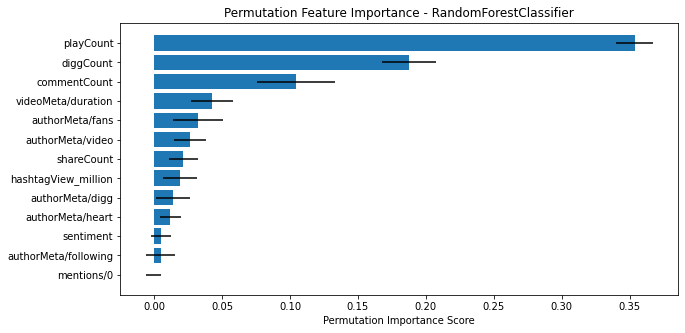

In [85]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

# Compute permutation importance for Random Forest model
perm_importance_rf = permutation_importance(rf_model, X_test_scaled, y_test, scoring="f1_weighted", n_repeats=10, random_state=42)

# Get feature names
feature_names_rf = X_train.columns

# Sort by importance
sorted_idx_rf = perm_importance_rf.importances_mean.argsort()

# Plot the permutation importance
plt.figure(figsize=(10, 5))
plt.barh(feature_names_rf[sorted_idx_rf], perm_importance_rf.importances_mean[sorted_idx_rf], xerr=perm_importance_rf.importances_std[sorted_idx_rf])
plt.xlabel("Permutation Importance Score")
plt.title("Permutation Feature Importance - RandomForestClassifier")
plt.show()


In [ ]:
import xgboost as xgb

# Initialize the XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42)

# Train the model using the scaled training data
xgb_model.fit(X_train_scaled, y_train)

# Make predictions on the scaled testing data
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Calculate metrics
precision = precision_score(y_test, y_pred_xgb, average='weighted')
recall = recall_score(y_test, y_pred_xgb, average='weighted')
f1 = f1_score(y_test, y_pred_xgb, average='weighted')
roc_auc = roc_auc_score(pd.get_dummies(y_test), pd.get_dummies(y_pred_xgb), multi_class='ovo')

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")

# Detailed classification report
print(classification_report(y_test, y_pred_xgb, target_names=bin_labels))

# # Evaluate the model
# mse_xgb = mean_squared_error(y_test, y_pred_xgb)
# r2_xgb = r2_score(y_test, y_pred_xgb)

# print(f"XGBoost - Mean Squared Error (MSE): {mse_xgb:.2f}")
# print(f"XGBoost - R-squared (R²): {r2_xgb:.2f}")


In [74]:
from sklearn.ensemble import HistGradientBoostingClassifier

# Initialize the HGBoost model
hgb_model = HistGradientBoostingClassifier(random_state=42)

# Train the model using the scaled training data
hgb_model.fit(X_train_scaled, y_train)

# Make predictions on the scaled testing data
y_pred_hgb = hgb_model.predict(X_test_scaled)

# Calculate metrics
precision = precision_score(y_test, y_pred_hgb, average='weighted')
recall = recall_score(y_test, y_pred_hgb, average='weighted')
f1 = f1_score(y_test, y_pred_hgb, average='weighted')
roc_auc = roc_auc_score(pd.get_dummies(y_test), pd.get_dummies(y_pred_hgb), multi_class='ovo')

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")

# Detailed classification report
print(classification_report(y_test, y_pred_hgb, target_names=bin_labels))

# # Evaluate the model
# mse_hgb = mean_squared_error(y_test, y_pred_hgb)
# r2_hgb = r2_score(y_test, y_pred_hgb)

# print(f"HGBoost - Mean Squared Error (MSE): {mse_xgb:.2f}")
# print(f"HGBoost - R-squared (R²): {r2_xgb:.2f}")

Precision: 0.86
Recall: 0.86
F1-Score: 0.86
ROC-AUC: 0.29
              precision    recall  f1-score   support

         Low       0.90      0.92      0.91        78
      Medium       0.89      0.85      0.87        78
        High       0.79      0.81      0.80        84

    accuracy                           0.86       240
   macro avg       0.86      0.86      0.86       240
weighted avg       0.86      0.86      0.86       240



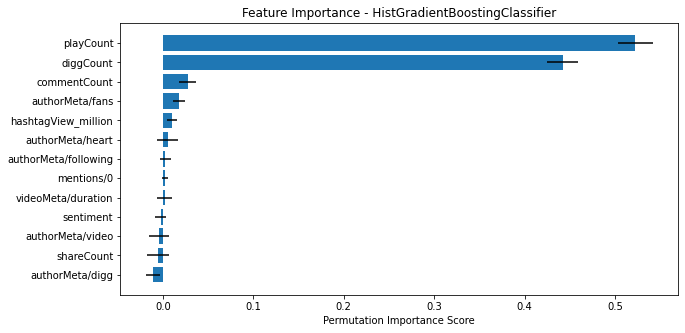

In [86]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

# Compute permutation importance
perm_importance = permutation_importance(hgb_model, X_test_scaled, y_test, scoring="f1_weighted", n_repeats=10, random_state=42)

# Get feature names
feature_names = X_train.columns

# Sort by importance
sorted_idx = perm_importance.importances_mean.argsort()

# Plot
plt.figure(figsize=(10, 5))
plt.barh(feature_names[sorted_idx], perm_importance.importances_mean[sorted_idx], xerr=perm_importance.importances_std[sorted_idx])
plt.xlabel("Permutation Importance Score")
plt.title("Feature Importance - HistGradientBoostingClassifier")
plt.show()
